In [ ]:
#PASSO 1 - EXPLICAÇÃO DOS DADOS 

#Age: Idade em anos em que uma mulher está grávida.
#SystolicBP: Valor superior da Pressão Arterial em mmHg, outro atributo significativo durante a gravidez.
#DiastolicBP: Menor valor da Pressão Arterial em mmHg, outro atributo significativo durante a gravidez.
#BodyTemp: Tempearatura corporal
#BS: Os níveis de glicose no sangue são em termos de concentração molar, mmol/L.
#HeartRate: Uma frequência cardíaca normal em repouso em batimentos por minuto.
#Risk Level: Nível de Intensidade de Risco Previsto durante a gravidez considerando o atributo anterior.

In [ ]:
#PASSO 2 - IMPORTAÇÕES UTILIZADAS NESTE TRABALHO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier #importação do modelo de classificação KNN
from sklearn.preprocessing import StandardScaler #normalização dos dados
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #classifico os riscos como número

from sklearn import metrics #avaliar o modelo

from sklearn.model_selection import train_test_split, GridSearchCV
#train_test_split: Divide o conjunto de dados
#GridSearchCV: é uma forma de validação dos dados (ajuda a definir qual o melhor hiperparâmetro)


In [ ]:
#PASSO 03 -LEITURA DO CONJUNTO DE DADOS
dataset = pd.read_csv('./Maternal Health Risk Data Set.csv')
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
#PASSO 04 -SEPARAÇÃO DOS ATRIBUTOS E CLASSES
# Separação dos atributos e Classes.
X = dataset.drop(['RiskLevel'],axis=1)
y = dataset.RiskLevel

print(X.shape)
print(y.shape)

(1014, 6)
(1014,)


In [ ]:
#PASSO 05 - LABEL ENCODING
#alto risco -> 0
#médio risco ->2
#baixo risco -> 1
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
#PASSO 06 -  SEPARAÇÃO DOS DADOS EM CONJUNTO DE TREINO E TESTE.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#PASSO 07 -  NORMALIZAÇÃO DOS DADOS
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#PASSO 08 -  ESCOLHA DOS HIPERPARAMETROS 
# n_neig é k-vizihnos próximos: e é uma lista de 1 à 50: [1, ...,50]
# p ------> distancia          : Euclidiana(1) e a de Manhatan(2)
param_grid = {
    'n_neighbors': list(range(1, 51)),
    'p': [1, 2]
}

# Treinamento do Modelo
KNN_gs= GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
KNN_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [ ]:
print("KNN - Hiperparâmetros selecionados: ")
KNN_gs.best_params_

KNN - Hiperparâmetros selecionados: 


{'n_neighbors': 1, 'p': 2}

## Métricas de Classificação

In [ ]:
#PASSO 09 - MÉTRICAS DE CLASSIFICAÇÃO 
KNN_pred = KNN_gs.predict(X_test)

print(f"Acurácia do modelo KNN {metrics.accuracy_score(y_test, KNN_pred):.3f}")
print(metrics.classification_report(y_test, KNN_pred))

Acurácia do modelo KNN 0.813
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        47
           1       0.80      0.76      0.78        80
           2       0.79      0.80      0.80        76

    accuracy                           0.81       203
   macro avg       0.82      0.83      0.82       203
weighted avg       0.81      0.81      0.81       203



## Matriz de Confusão

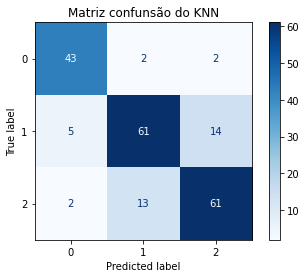

In [ ]:
#PASSO 10 - MATRIZ DE CONFUSÃO
cm = metrics.confusion_matrix(y_test, KNN_pred, labels=KNN_gs.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN_gs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz confunsão do KNN");